# Шакиров Тимур Маратович

## ИУ5-65Б

### 19 вариант

pandas — для работы с таблицами (DataFrame),

StandardScaler и LabelEncoder из sklearn — для масштабирования и кодирования признаков,

seaborn и matplotlib.pyplot — для визуализации данных,

numpy — для работы с массивами и математикой.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Загружается датасет toy_dataset.csv с указанием, что в нём используется разделитель ;. Результат сохраняется в переменной df (DataFrame).

In [3]:
file_path = "toy_dataset.csv"
df = pd.read_csv(file_path, delimiter=';')

In [4]:
print("Общая информация о данных:")
print(df.info())
display(df.head())

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB
None


,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [5]:
print("\nПроверка на пропуски:")
print(df.isnull().sum())


Проверка на пропуски:
Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64


Если в данных изначально нет пропусков, создаются искусственные пропуски в 1% строк столбца Income. Это нужно для демонстрации обработки отсутствующих значений.

In [6]:
if df.isnull().sum().sum() == 0:
    print("\nПропусков не найдено. Добавим искусственные пропуски.")
    nan_indices = df.sample(frac=0.01, random_state=42).index
    df.loc[nan_indices, 'Income'] = np.nan


Пропусков не найдено. Добавим искусственные пропуски.


После добавления пропусков ещё раз выводится количество пропусков по столбцам — теперь они должны быть в столбце Income.

In [7]:
print("\nПосле добавления пропусков:")
print(df.isnull().sum())


После добавления пропусков:
Number        0
City          0
Gender        0
Age           0
Income     1500
Illness       0
dtype: int64


Пропущенные значения в столбце Income заполняются средним значением по этому столбцу (mean).

In [8]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

Происходит стандартизация (нормализация) столбца Income: создаётся новый столбец Income_scaled, где значения имеют среднее 0 и стандартное отклонение 1. Это важно для модели машинного обучения.

In [9]:
scaler = StandardScaler()
df['Income_scaled'] = scaler.fit_transform(df[['Income']])

Категориальный признак Gender преобразуется в числовой формат с помощью LabelEncoder, создаётся новый столбец Gender_LabelEncoded.

In [10]:
label_encoder = LabelEncoder()
df['Gender_LabelEncoded'] = label_encoder.fit_transform(df['Gender'])

Также применяется one-hot кодирование к столбцу Gender, создаются новые столбцы (например, Gender_Female, Gender_Male) с бинарными значениями 0 и 1. Результат сохраняется в df_onehot.

In [11]:
df_onehot = pd.get_dummies(df, columns=['Gender'], prefix='Gender')

Для визуализации случайным образом выбирается 1000 строк из исходного датафрейма. Это позволяет ускорить визуализацию и сделать графики более читаемыми.

In [12]:
sample_df = df.sample(1000, random_state=42)

Создаётся парная диаграмма (pairplot) для переменных Age, Income, Income_scaled и Gender_LabelEncoded. Это помогает визуально оценить распределение и взаимосвязи между переменными.

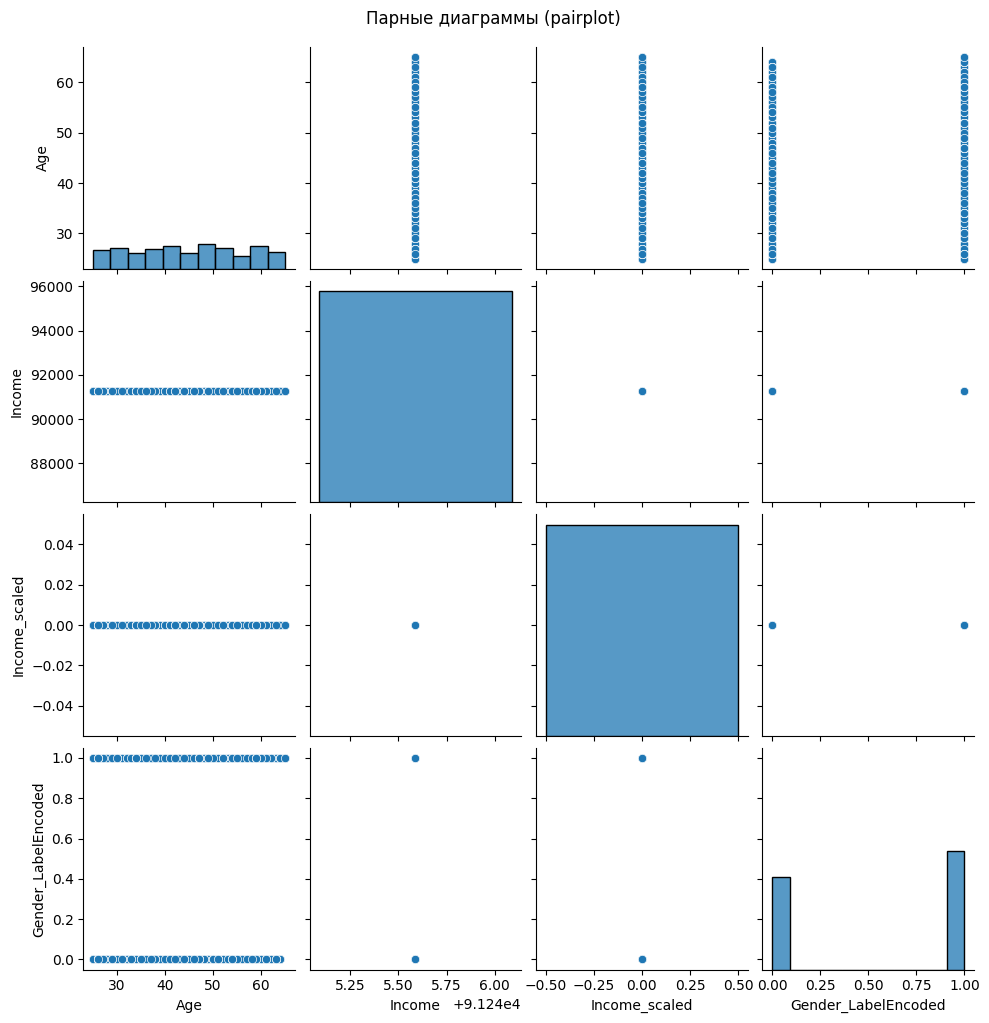

In [13]:
sns.pairplot(sample_df[['Age', 'Income', 'Income_scaled', 'Gender_LabelEncoded']])
plt.suptitle("Парные диаграммы (pairplot)", y=1.02)
plt.show()